# Tasa de Cambio Representativa del Mercado

This notebook presents the pipeline of visualizing the exchange rate $\frac{COP}{USD}$ at different time periods in Colombia. The data is made available by 'Superintendencia Financiera de Colombia' and according to them: The 'Tasa de Cambio Representativa del Mercado' (TRM) corresponds to the weighted average of the purchase and selling of US dollars in exchange of colombian pesos.

You can download the latest data [here](https://www.datos.gov.co/Econom-a-y-Finanzas/Tasa-de-Cambio-Representativa-del-Mercado-Historic/mcec-87by/about_data).

In [1]:
# First load the following libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("figure", figsize=(10, 6))

## Load data

In [2]:
# First let's load the data

data = pd.read_csv("Tasa_de_Cambio_Representativa_del__Mercado_-Historico_20250710.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   VALOR          8068 non-null   float64
 1   UNIDAD         8068 non-null   object 
 2   VIGENCIADESDE  8068 non-null   object 
 3   VIGENCIAHASTA  8068 non-null   object 
dtypes: float64(1), object(3)
memory usage: 252.3+ KB


## Transformation

You can see that 'VIGENCIADESDE' and 'VIGENCIAHASTA' columns are not in the right date format, instead after the import they are represented as Python objects. Let's create a short function that transforms the dtype columns and sort the dataframe:

In [3]:
def set_dtypes(dataf):
    """
    This function transform some columns to 'pd.datetime', then sort the dataframe,
    and finally set a column as the dataframe's index.
    """
    return (dataf
        .assign(VIGENCIADESDE = lambda d: pd.to_datetime(d['VIGENCIADESDE'], format="%d/%m/%Y"))
        .assign(VIGENCIAHASTA = lambda d: pd.to_datetime(d['VIGENCIAHASTA'], format="%d/%m/%Y"))
        .sort_values(by=['VIGENCIADESDE', 'VIGENCIAHASTA'], ascending=False)
        .set_index('VIGENCIADESDE'))

In [4]:
# Now you can see the date columns have the right dtype

data = data.pipe(set_dtypes)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8068 entries, 2025-07-10 to 1991-12-02
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   VALOR          8068 non-null   float64       
 1   UNIDAD         8068 non-null   object        
 2   VIGENCIAHASTA  8068 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 252.1+ KB


## Line plots

### Total TRM

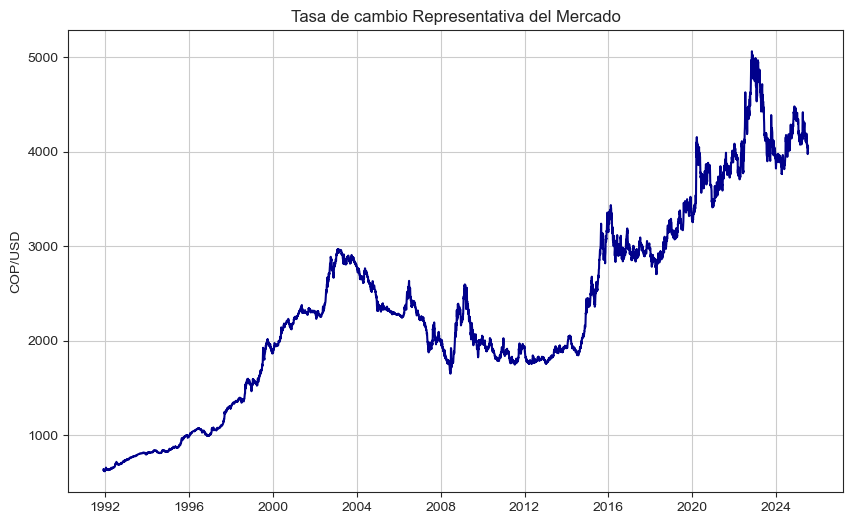

In [5]:
# Let's create a line plot of TRM from 1992

sns.set_style("ticks")
sns.lineplot(data=data,
             x=data.index,
             y="VALOR",
             color="darkblue")
plt.title("Tasa de cambio Representativa del Mercado")
plt.ylabel("COP/USD")
plt.xlabel(None)
plt.grid()

### TRM 2025

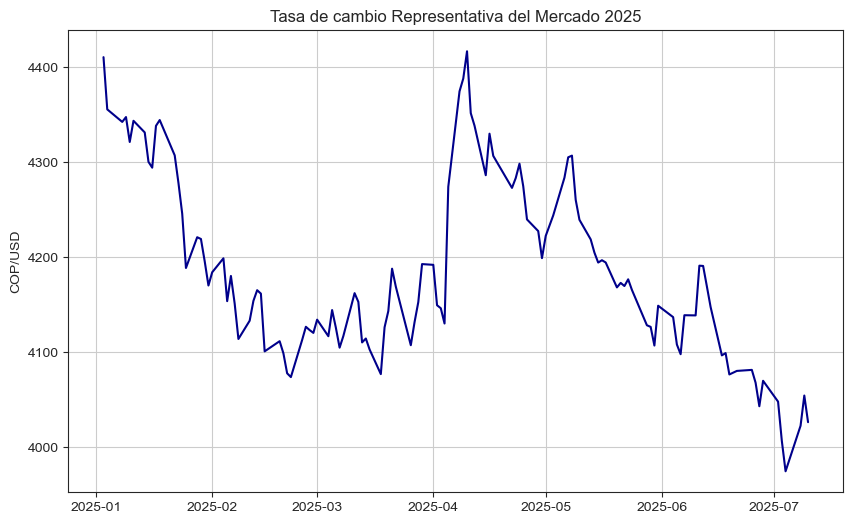

In [6]:
# Let's create the line plot of TRM for only the year 2025

subset = data.loc["2025"]

sns.lineplot(data=subset,
             x=subset.index,
             y="VALOR",
             color="darkblue")
plt.title("Tasa de cambio Representativa del Mercado 2025")
plt.ylabel("COP/USD")
plt.xlabel(None)
plt.grid()

### TRM 2022-2025

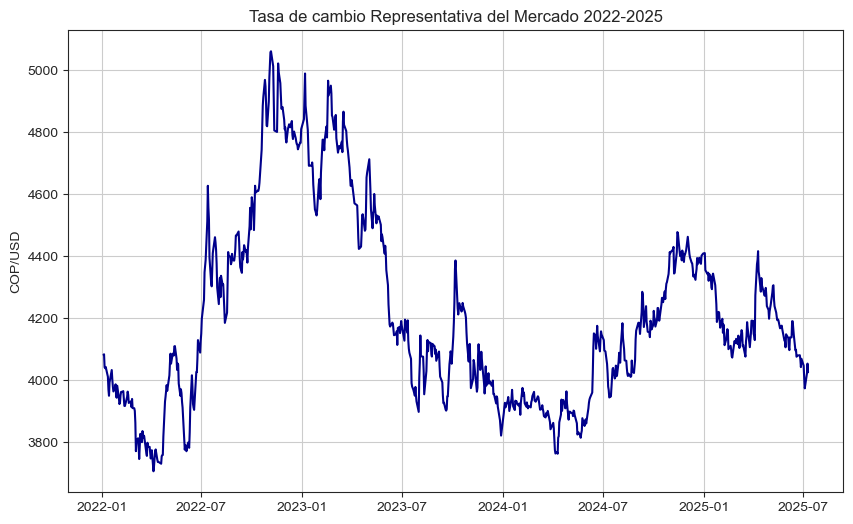

In [7]:
# Let's create the line plot of TRM from 2022 to 2025

subset = data.truncate(before="2022-01-01")

sns.lineplot(data=subset, x=subset.index, y="VALOR", color="darkblue")
plt.title("Tasa de cambio Representativa del Mercado 2022-2025")
plt.ylabel("COP/USD")
plt.xlabel(None)
plt.grid()

## Conclusion

Since the beginning of the year 2025, we are observing that the exchange rate $\frac{COP}{USD}$ is remarkably decreasing given the fact that the US dollar is losing its value not only v.s. developed countries currencies, but also comparing to developing countries currencies. It is worth to keep monitoring this numbers given the global uncertainty the world is experiencing.